Import libaries

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np 
import pandas as pd 
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,plot_roc_curve,auc,precision_recall_curve,plot_precision_recall_curve,average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

Importing dataset

In [ ]:
df = pd.read_csv('train_strokes.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [ ]:
df.shape

(43400, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [ ]:
df = df.drop("id", axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [ ]:
print(f'The dataset consists of {df.shape[0]} instances with {df.shape[1]-1} features and 1 target variable')

The dataset consists of 43400 instances with 10 features and 1 target variable


In [ ]:
df.columns = df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df.duplicated().value_counts()

False    43400
dtype: int64

Missing Values

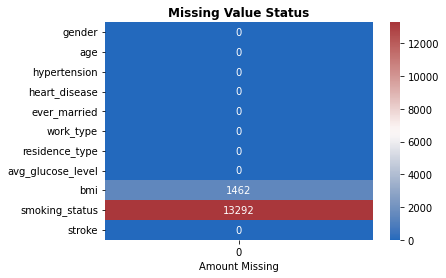

In [ ]:
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(df.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Amount Missing')
plt.show()

In [ ]:
df.bmi.replace(to_replace=np.nan, value=df.bmi.mean(),inplace=True)


In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,22.519649,0.291235,0.212733,43.111751,7.638023,0.133103
min,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.000000,0.000000,77.540000,23.400000,0.000000
50%,44.000000,0.000000,0.000000,91.580000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,112.070000,32.600000,0.000000
max,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


**Data Preprocessing**

Label Encoding

In [ ]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['residence_type'] = le.fit_transform(df['residence_type'])


In [ ]:
df['smoking_status'] = le.fit_transform(df['smoking_status'])

In [ ]:
df.smoking_status.replace(to_replace=np.nan, value=df.bmi.mean(),inplace=True)

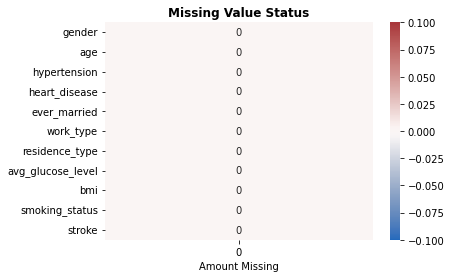

In [ ]:
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(df.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Amount Missing')
plt.show()

In [ ]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values
print('X Shape', X.shape)


X Shape (43400, 9)


In [ ]:
print('Y Shape',y.shape)

Y Shape (43400,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

Smote

In [ ]:
print('Before OverSampling, counts of label 1: {}'.format(sum(y==1)))
print('Before OverSampling, counts of label 0: {} \n'.format(sum(y==0)))

Before OverSampling, counts of label 1: 783
Before OverSampling, counts of label 0: 42617 



In [ ]:
sm = SMOTE(random_state=2)
X_res, y_res = sm.fit_resample(X,y.ravel())


print('After OverSampling, the shape of train_x: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {}'.format(y_res.shape))

print('After OverSampling, counts of label 1: {}'.format(sum(y_res == 1)))
print('After OverSampling, counts of label 0: {}'.format(sum(y_res == 0)))

After OverSampling, the shape of train_x: (85234, 9)
After OverSampling, the shape of train_y: (85234,)
After OverSampling, counts of label 1: 42617
After OverSampling, counts of label 0: 42617


In [ ]:

X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.3,random_state=0)
print('Number transations x_train df',X_train.shape)
print('Number transations x_test df',X_test.shape)
print('Number transations y_train df',y_train.shape)
print('Number transations y_test df',y_test.shape)

Number transations x_train df (59663, 9)
Number transations x_test df (25571, 9)
Number transations y_train df (59663,)
Number transations y_test df (25571,)


In [ ]:
models = []
models.append(['XGBClassifier',XGBClassifier(learning_rate=0.1,objective='binary:logistic',random_state=0,eval_metric='mlogloss')])
models.append(['KNeigbors',KNeighborsClassifier()])
models.append(['RandomForest',RandomForestClassifier(random_state=0)])


In [ ]:
lst_1 = []
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    accuracies = cross_val_score(estimator= model, X = X_train,y = y_train, cv=10)

# k-fOLD Validation
    roc = roc_auc_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('')
    print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('')
    print('Precision: {:.2f} %'.format(precision))
    print('')
    print('Recall: {:.2f} %'.format(recall))
    print('')
    print('F1 Score: {:.2f} %'.format(f1))
    print('-'*40)
    print('')
    lst_2.append(models[m][0])
    lst_2.append(accuracy_score(y_test,y_pred)*100)
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)


XGBClassifier :
[[10482  2163]
 [ 1269 11657]]
Accuracy Score:  0.8657854600915099

K-Fold Validation Mean Accuracy: 86.56 %

Standard Deviation: 0.47 %

ROC AUC Score: 0.87 %

Precision: 0.84 %

Recall: 0.90 %

F1 Score: 0.87 %
----------------------------------------

KNeigbors :
[[11036  1609]
 [  144 12782]]
Accuracy Score:  0.9314457784208674

K-Fold Validation Mean Accuracy: 92.82 %

Standard Deviation: 0.25 %

ROC AUC Score: 0.93 %

Precision: 0.89 %

Recall: 0.99 %

F1 Score: 0.94 %
----------------------------------------

RandomForest :
[[12131   514]
 [  207 12719]]
Accuracy Score:  0.9718039967150287

K-Fold Validation Mean Accuracy: 96.95 %

Standard Deviation: 0.20 %

ROC AUC Score: 0.97 %

Precision: 0.96 %

Recall: 0.98 %

F1 Score: 0.97 %
----------------------------------------



In [ ]:
df2 = pd.DataFrame(lst_1,columns=['Model','Accuracy','K-Fold Mean Accuracy','Std.Deviation','ROC_AUC','Precision','Recall','F1 Score'])

df2.sort_values(by=['Accuracy','K-Fold Mean Accuracy'],inplace=True,ascending=False)
df2

,Model,Accuracy,K-Fold Mean Accuracy,Std.Deviation,ROC_AUC,Precision,Recall,F1 Score
2,RandomForest,97.180400,96.951208,0.199401,0.971669,0.961158,0.983986,0.972438
1,KNeigbors,93.144578,92.823010,0.254286,0.930808,0.888194,0.988860,0.935828
0,XGBClassifier,86.578546,86.564529,0.473966,0.865385,0.843488,0.901826,0.871682


MODEL TUNING

In [ ]:
grid_models = [(XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}]),
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]),  
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}])]

In [197]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(X_train,y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print(' {}: \n Best Accuracy: {:.2f} %'.format(i,best_accuracy*100))
    print('')
    print('-'*25)
    print('')

 XGBClassifier(): 
 Best Accuracy: 86.56 %

-------------------------

 KNeighborsClassifier(): 
 Best Accuracy: 93.17 %

-------------------------

 RandomForestClassifier(): 
 Best Accuracy: 97.01 %

-------------------------



[[10482  2163]
 [ 1269 11657]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86     12645
           1       0.84      0.90      0.87     12926

    accuracy                           0.87     25571
   macro avg       0.87      0.87      0.87     25571
weighted avg       0.87      0.87      0.87     25571

ROC AUC score: 0.9529284407327117
Accuracy Score:  0.8657854600915099


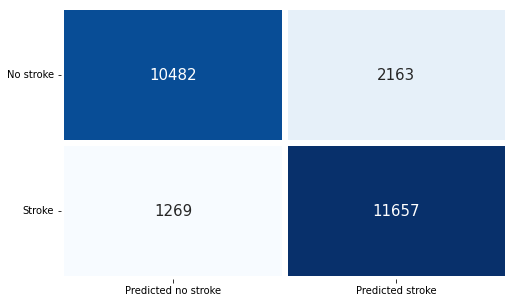

In [198]:
classifier = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()


In [199]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

[[11036  1609]
 [  144 12782]]
              precision    recall  f1-score   support

           0       0.99      0.87      0.93     12645
           1       0.89      0.99      0.94     12926

    accuracy                           0.93     25571
   macro avg       0.94      0.93      0.93     25571
weighted avg       0.94      0.93      0.93     25571

ROC AUC score: 0.970923586871939
Accuracy Score:  0.9314457784208674


In [200]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))


[[12151   494]
 [  231 12695]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     12645
           1       0.96      0.98      0.97     12926

    accuracy                           0.97     25571
   macro avg       0.97      0.97      0.97     25571
weighted avg       0.97      0.97      0.97     25571

ROC AUC score: 0.997042378959539
Accuracy Score:  0.9716475695123382


In [201]:
from sklearn.ensemble import VotingClassifier
clf1 = XGBClassifier(learning_rate=0.1,objective='binary:logistic',random_state=0,eval_metric='mlogloss')
clf2 = KNeighborsClassifier()
clf3 = RandomForestClassifier()
model = VotingClassifier(estimators=[('XGB', clf1), ('KNN', clf2), ('RF', clf3)], voting='soft')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     12645
           1       0.92      0.99      0.95     12926

    accuracy                           0.95     25571
   macro avg       0.95      0.95      0.95     25571
weighted avg       0.95      0.95      0.95     25571

[[11584  1061]
 [  158 12768]]


In [202]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
error=np.sqrt(mean_squared_error(y_test,y_pred))

In [203]:
error


0.16838179975181938

In [204]:
import pickle
with open('model_pickle.pkl','wb') as file:
    pickle.dump(model,file)

Building a predictive system